In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
encoding = 'latin1'
cards_cleaned = pd.read_csv('cards_cleaned.csv', encoding=encoding)

In [4]:
cards_cleaned.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor,sentiment
0,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6,6,3,LEGENDARY,True,It's like putting racing stripes and a giant s...,very positive
1,AT_131,NEUTRAL,MINION,Eydis Darkbane,TGT,Whenever <b>you</b> target this minion with a ...,3,3,4,LEGENDARY,True,"HATES being called ""the wonder twins"".",very negative
2,EX1_583,NEUTRAL,MINION,Priestess of Elune,EXPERT1,<b>Battlecry:</b> Restore 4 Health to your hero.,6,5,4,COMMON,True,"If she threatens to ""moon"" you, it's not what ...",negative
3,CFM_095,NEUTRAL,MINION,Weasel Tunneler,GANGS,<b>Deathrattle:</b> Shuffle this minion into y...,1,1,1,EPIC,True,He's the reason the First Bank of Gadgetzan ha...,positive
4,BRM_018,PALADIN,MINION,Dragon Consort,BRM,<b>Battlecry:</b> The next Dragon you play cos...,5,5,5,RARE,True,Everybody wants someone to snuggle with. Even ...,very negative


sentimental analysis.
BERT (Bidirectional Encoder Representations from Transformers), which is a transformer-based model.

In [5]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [6]:
# specify model
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [7]:
# Create a sentiment analysis pipeline using the loaded tokenizer and model
sentiment_analysis_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [8]:
sentiments = []

for flavor_text in cards_cleaned['flavor']:
    if pd.notna(flavor_text):
        result = sentiment_analysis_pipeline(flavor_text)
        sentiments.append(result[0]['label'])

In [9]:
# Replace the following line:
#cards_cleaned['sentiment'] = sentiments

# With the following line:
cards_cleaned.loc[cards_cleaned['flavor'].notna(), 'sentiment'] = sentiments

In [10]:
cards_cleaned.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor,sentiment
0,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6,6,3,LEGENDARY,True,It's like putting racing stripes and a giant s...,5 stars
1,AT_131,NEUTRAL,MINION,Eydis Darkbane,TGT,Whenever <b>you</b> target this minion with a ...,3,3,4,LEGENDARY,True,"HATES being called ""the wonder twins"".",1 star
2,EX1_583,NEUTRAL,MINION,Priestess of Elune,EXPERT1,<b>Battlecry:</b> Restore 4 Health to your hero.,6,5,4,COMMON,True,"If she threatens to ""moon"" you, it's not what ...",2 stars
3,CFM_095,NEUTRAL,MINION,Weasel Tunneler,GANGS,<b>Deathrattle:</b> Shuffle this minion into y...,1,1,1,EPIC,True,He's the reason the First Bank of Gadgetzan ha...,4 stars
4,BRM_018,PALADIN,MINION,Dragon Consort,BRM,<b>Battlecry:</b> The next Dragon you play cos...,5,5,5,RARE,True,Everybody wants someone to snuggle with. Even ...,1 star


In [11]:
cards_cleaned['sentiment'].unique()

array(['5 stars', '1 star', '2 stars', '4 stars', '3 stars'], dtype=object)

In [12]:
# mapping
sentiment_mapping = {
    '1 star': 'very negative',
    '2 stars': 'negative',
    '3 stars': 'neutral',
    '4 stars': 'positive',
    '5 stars': 'very positive'
}

In [13]:
cards_cleaned['sentiment'] = cards_cleaned['sentiment'].map(sentiment_mapping)

In [14]:
cards_cleaned.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor,sentiment
0,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6,6,3,LEGENDARY,True,It's like putting racing stripes and a giant s...,very positive
1,AT_131,NEUTRAL,MINION,Eydis Darkbane,TGT,Whenever <b>you</b> target this minion with a ...,3,3,4,LEGENDARY,True,"HATES being called ""the wonder twins"".",very negative
2,EX1_583,NEUTRAL,MINION,Priestess of Elune,EXPERT1,<b>Battlecry:</b> Restore 4 Health to your hero.,6,5,4,COMMON,True,"If she threatens to ""moon"" you, it's not what ...",negative
3,CFM_095,NEUTRAL,MINION,Weasel Tunneler,GANGS,<b>Deathrattle:</b> Shuffle this minion into y...,1,1,1,EPIC,True,He's the reason the First Bank of Gadgetzan ha...,positive
4,BRM_018,PALADIN,MINION,Dragon Consort,BRM,<b>Battlecry:</b> The next Dragon you play cos...,5,5,5,RARE,True,Everybody wants someone to snuggle with. Even ...,very negative


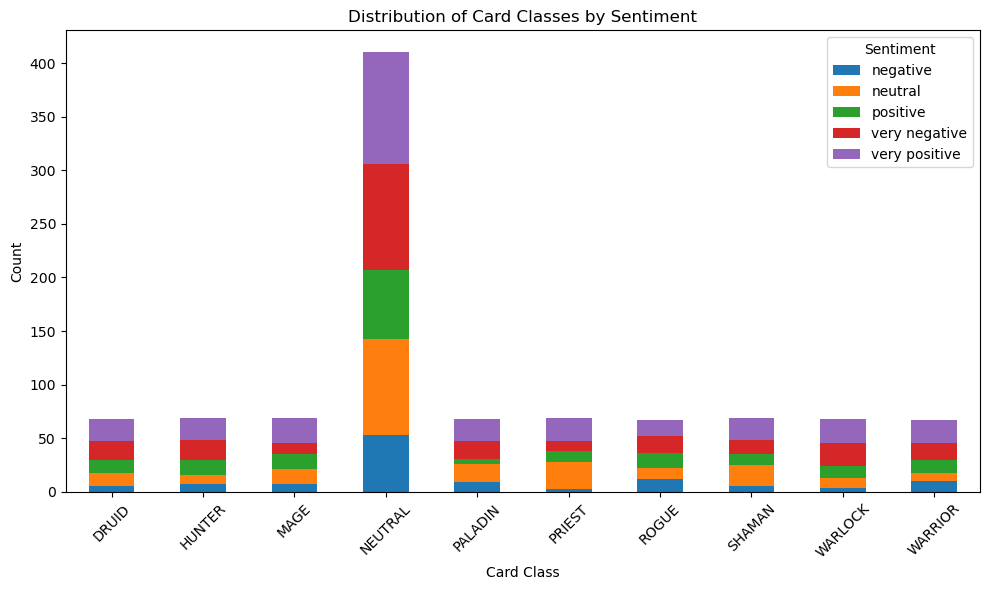

In [15]:
# Group by playerClass and sentiment, and count the number of occurrences
class_sentiment_counts = cards_cleaned.groupby(['playerClass', 'sentiment']).size().unstack(fill_value=0)

# Plotting
ax = class_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Card Classes by Sentiment')
plt.xlabel('Card Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

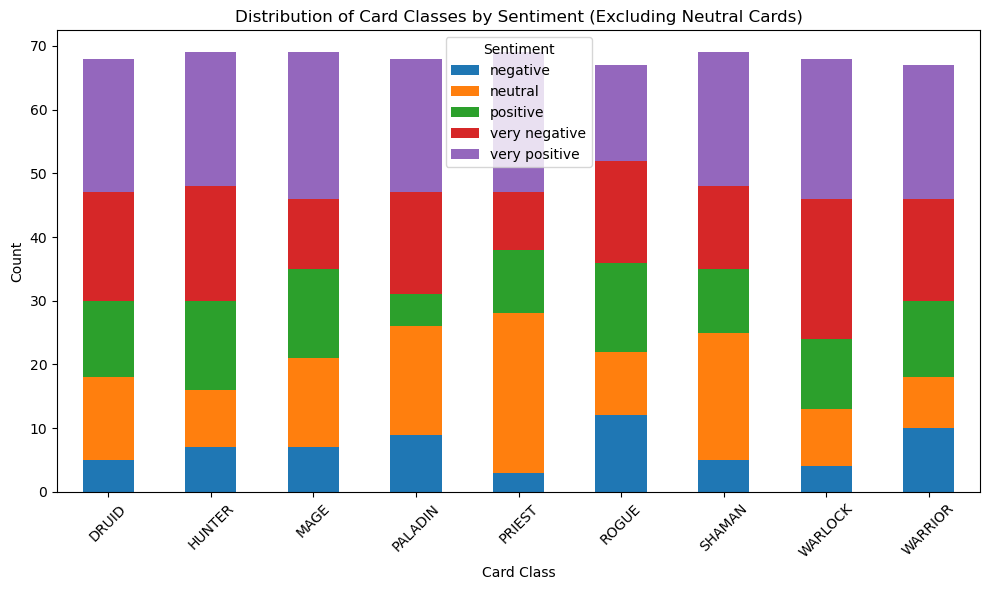

In [16]:
# Filter out neutral cards
cards_cleaned_filtered = cards_cleaned[cards_cleaned['playerClass'] != 'NEUTRAL']

# Group by playerClass and sentiment, and count the number of occurrences
class_sentiment_counts = cards_cleaned_filtered.groupby(['playerClass', 'sentiment']).size().unstack(fill_value=0)

# Check if there are no neutral cards left in the data
if 'NEUTRAL' in class_sentiment_counts.index:
    class_sentiment_counts.drop('NEUTRAL', inplace=True)

# Plotting
class_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Card Classes by Sentiment (Excluding Neutral Cards)')
plt.xlabel('Card Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [24]:
sentiment_categories=cards_cleaned['sentiment'].unique()

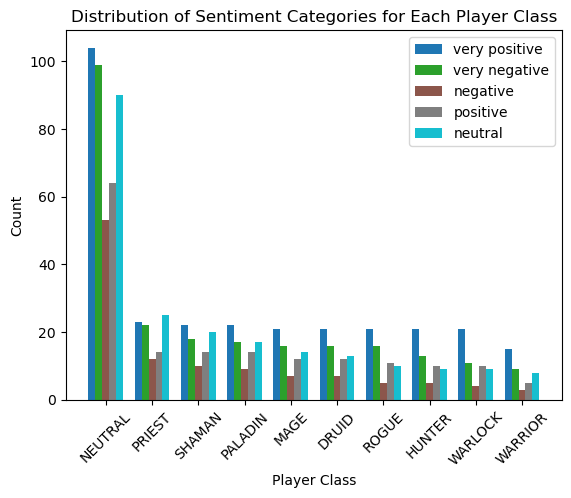

In [26]:
# Set up colors for the plot
colors = plt.cm.tab10(np.linspace(0, 1, len(sentiment_categories)))

# Set up colors for the plot
colors = plt.cm.tab10(np.linspace(0, 1, len(sentiment_categories)))

# Create a grouped bar plot for each sentiment category
for i, sentiment in enumerate(sentiment_categories):
    # Filter data for the current sentiment category
    data = cards_cleaned[cards_cleaned['sentiment'] == sentiment]
    # Calculate counts of each player class for the current sentiment category
    class_counts = data['playerClass'].value_counts()
    # Plot grouped bar for the current sentiment category
    plt.bar(np.arange(len(class_counts)) + i*0.15, class_counts.values, color=colors[i], width=0.15, label=sentiment)

# Set x-axis ticks and labels with rotation
plt.xticks(np.arange(len(class_counts)) + 0.3, class_counts.index, rotation=45)

# Add labels and title
plt.xlabel('Player Class')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Categories for Each Player Class')
plt.legend()

# Show plot
plt.show()

In [28]:
# Create an empty dictionary to store counts for each sentiment category
sentiment_counts = {}

# Iterate over each sentiment category
for sentiment in sentiment_categories:
    # Filter data for the current sentiment category
    data = cards_cleaned[cards_cleaned['sentiment'] == sentiment]
    # Count the number of occurrences of each unique value in the filtered data
    value_counts = data['playerClass'].value_counts()
    # Store the counts in the dictionary with sentiment category as key
    sentiment_counts[sentiment] = value_counts

# Print the counts for each sentiment category
for sentiment, counts in sentiment_counts.items():
    print(f"Sentiment: {sentiment}")
    print(counts)
    print()

Sentiment: very positive
playerClass
NEUTRAL    104
MAGE        23
PRIEST      22
WARLOCK     22
DRUID       21
SHAMAN      21
HUNTER      21
PALADIN     21
WARRIOR     21
ROGUE       15
Name: count, dtype: int64

Sentiment: very negative
playerClass
NEUTRAL    99
WARLOCK    22
HUNTER     18
DRUID      17
PALADIN    16
WARRIOR    16
ROGUE      16
SHAMAN     13
MAGE       11
PRIEST      9
Name: count, dtype: int64

Sentiment: negative
playerClass
NEUTRAL    53
ROGUE      12
WARRIOR    10
PALADIN     9
MAGE        7
HUNTER      7
DRUID       5
SHAMAN      5
WARLOCK     4
PRIEST      3
Name: count, dtype: int64

Sentiment: positive
playerClass
NEUTRAL    64
HUNTER     14
ROGUE      14
MAGE       14
WARRIOR    12
DRUID      12
WARLOCK    11
PRIEST     10
SHAMAN     10
PALADIN     5
Name: count, dtype: int64

Sentiment: neutral
playerClass
NEUTRAL    90
PRIEST     25
SHAMAN     20
PALADIN    17
MAGE       14
DRUID      13
ROGUE      10
HUNTER      9
WARLOCK     9
WARRIOR     8
Name: count, 

1. Distribution of Sentiment by Player Class:
The sentiment analysis reveals the distribution of sentiment categories (very positive, very negative, negative, positive, and neutral) across different player classes.
NEUTRAL cards tend to have a higher count in most sentiment categories compared to other player classes, indicating a wide range of sentiments expressed in their flavor text.
Other player classes such as MAGE, PRIEST, WARLOCK, and DRUID also exhibit notable counts in various sentiment categories, suggesting diverse perceptions and emotions associated with their cards.

2. Sentiment Strengths:
NEUTRAL cards receive high counts in both very positive and very negative sentiment categories, indicating a mixed sentiment towards these cards among players.
Certain player classes like NEUTRAL, HUNTER, and ROGUE have notable counts in positive sentiment categories, suggesting a generally positive perception of their cards' flavor text.

3. Impact on Player Perception:
The sentiment of flavor text may influence player perception and engagement with the cards. Cards with positive flavor text may receive higher ratings or be more favored by players compared to those with negative flavor text.

4. Addressing Negative Sentiment:
Cards with negative sentiment in their flavor text, especially those belonging to player classes like WARLOCK and PRIEST.  

5. Comparative Analysis:
Comparing the sentiment analysis results with the intended flavor or theme of the card as designed by developers can provide insights into any discrepancies or alignment between player sentiment and developer intention.